In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
#df.describe()
#df.info()

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [6]:
df.sort_values("price", ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


<AxesSubplot: xlabel='price', ylabel='Density'>

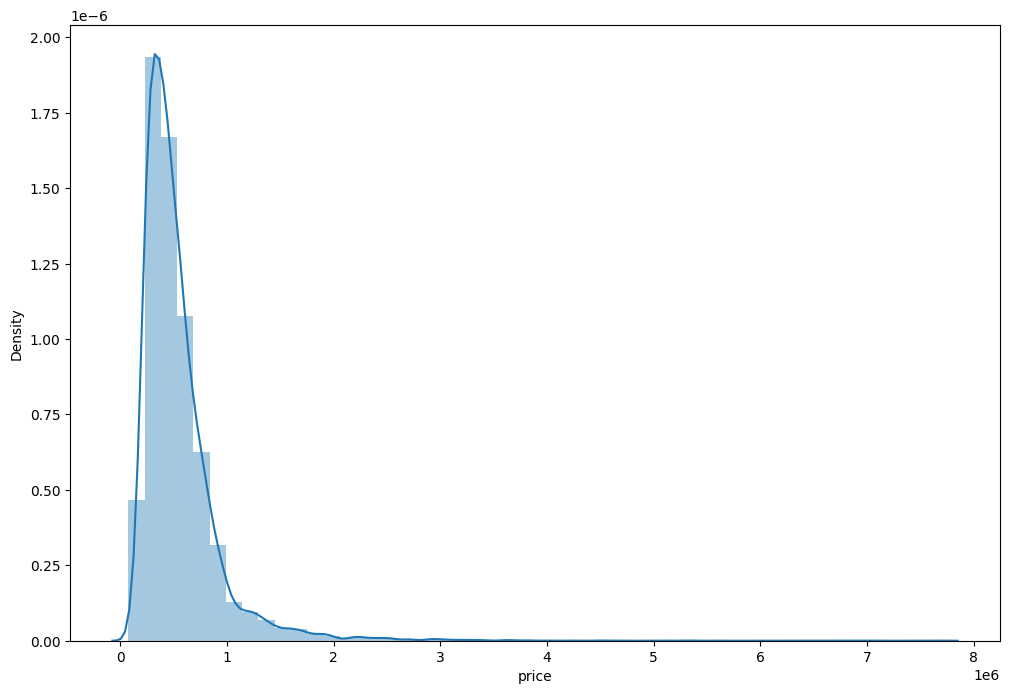

In [7]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

In [8]:
def round_bathrooms(df):
     # Round the 'bathrooms' column and convert to integers
    df['bathrooms'] = df['bathrooms'].round().astype(int)
    return df

In [9]:
df = round_bathrooms(df)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.loc[15870, 'bedrooms'] = 3

In [11]:
orginalsize = len(df)
orginalsize

21613

In [12]:
# Define function to remove outliers
def remove_outliers(df):
    # List of variables to check for outliers
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above',  
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    # Iterate over the variables and remove outliers
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [13]:
df = remove_outliers(df)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
newsize = len(df)
newsize

20058

In [15]:
def calculate_percentage_difference(orginalsize, newsize):
    # Calculate the percentage difference
    percentage_difference = (orginalsize - newsize) / orginalsize * 100
    # Round to 2 decimal places
    percentage_difference = round(percentage_difference, 2)
    return percentage_difference

In [16]:
calculate_percentage_difference(orginalsize, newsize)
#Calculate the percentage difference between two sizes

7.19

In [17]:
def remove_price_outliers (df) :
    """Remove price outliers from the input dataframe. 
    Outliers are defined as values that are
    more than 1.5 times the interquartile range above the third quartile.
    """
    # Sort the 'price' column
    sort_data = np.sort(df['price'])
    # Calculate the quartiles and interquartile range
    Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df['price'], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1 
    # Calculate the upper limit for outliers
    upper = Q3+1.5*IQR
    print ('upper limit for price = ',upper)
    # Select rows where 'price' is an outlier and store in a separate dataframe
    price_out_liers = df[df['price']>upper]
    # Remove rows where 'price' is an outlier from the original dataframe
    df = df[df['price']<upper]
    return df 

In [18]:
df = remove_price_outliers(df)

upper limit for price =  1076000.0


# Getting the feauters by Pearson Correlation Matrix and stepwise selection
## 

In [19]:
def plot_correlation_matrix(df):
    # List of features to include in the correlation matrix
    all_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    # Create a mask to only show the lower triangle of the matrix
    mask = np.zeros_like(df[all_features].corr())
    triangle_indices = np.triu_indices_from(mask)
    mask[triangle_indices] = True

    # Set the figure size and title
    plt.figure(figsize=(16, 10))
    plt.title('Pearson Correlation Matrix', fontsize=25)

    # Plot the heatmap
    sns.heatmap(df[all_features].corr(), mask=mask, annot=True, annot_kws={"size": 12}, cmap='Blues', linewidths=0.25)
    sns.set_style('white')

    # Set the font sizes for the x and y ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show the plot
    plt.show()
    

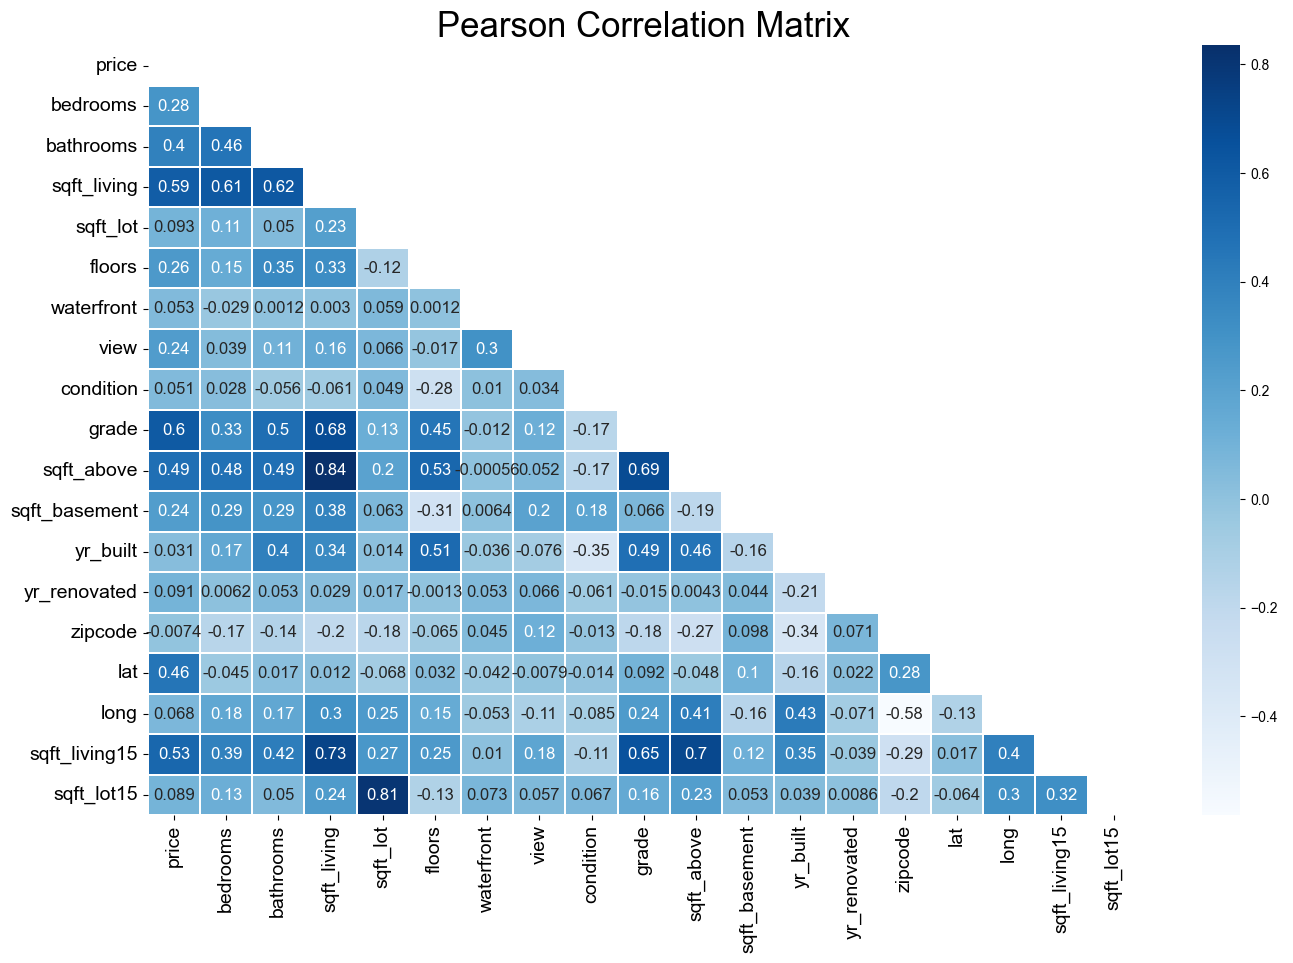

In [20]:
plot_correlation_matrix(df)

In [21]:
"""According to the Pearson Correlation Matrix, 
the features 'sqft_above' and 'sqft_living' are strongly correlated, so we removed 'sqft_above'. 
The feature 'sqft_living15' is moderately correlated with 'sqft_living', so we removed it.
Both 'sqft_lot' and 'sqft_lot15' are strongly correlated, but we decided to keep 'sqft_lot'.
We retained the features 'sqft_living' and 'sqft_lot'.
"""

def drop_correlated_features(df):
    # Drop correlated features
    df = df.drop(['id', 'date', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode'], axis=1)
    return df

# Drop correlated features from the dataframe
df = drop_correlated_features(df)

In [22]:
# Split the data into feature and target dataframes
# Create the feature dataframe
X = df.drop(['price'], axis=1)

# Create the target dataframe
y = df['price']

# Splitting the data

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [24]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):

        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:# Fit a model with the current list of included features and the new feature
                model = sm.OLS(y,        sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column] # Store the p-value of the new feature
            best_pval = new_pval.min() # Get the minimum p-value among the excluded features
            if best_pval < threshold_in: # If the minimum p-value is smaller than the threshold
                best_feature = new_pval.idxmin() # Get the feature with the minimum p-value
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Use  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax() # Get the maximum p-value among the included features
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [25]:
features_selected = stepwise_selection (X_train,y_train)
print ("Number of feauters used :",len(features_selected))

Use  grade                          with p-value 0.0
Use  yr_built                       with p-value 0.0
Use  lat                            with p-value 0.0
Use  sqft_living                    with p-value 0.0
Use  view                           with p-value 3.33049e-135
Use  condition                      with p-value 1.00272e-52
Use  floors                         with p-value 8.49877e-68
Use  bathrooms                      with p-value 2.81387e-18
Use  bedrooms                       with p-value 1.2069e-16
Use  waterfront                     with p-value 1.54177e-14
Use  long                           with p-value 8.64025e-12
Use  sqft_lot                       with p-value 5.33686e-06
Use  yr_renovated                   with p-value 4.20687e-05
Use  sqft_basement                  with p-value 0.000493102
Number of feauters used : 14


#### Save the dataframe for the 2nd Jupyter Notebook.

In [26]:
df.to_csv('kc_house_data_fixed.csv')

# Choosing appropriate model:


 ## Model 1 :  Linear regression  

### Model 1 :  Development

In [27]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training data
lm.fit(X_train, y_train)

# Model prediction on train data
y_pred = lm.predict(X_train)
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model metrics
acc_lm = metrics.r2_score(y_test, y_test_pred)
RMSE1T=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

###  Model 1:  Evaluation

In [28]:
def summary_statistics(model, X_train, y_train, X_test, y_test):

    print(f"Train set score: {model.score(X_train, y_train)}")
    print(f"Test set score: {model.score(X_test, y_test)}")
    print(f"Adjusted R^2: {1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)}")

In [29]:
summary_statistics(lm, X_train, y_train, X_test, y_test)
print('R^2:', acc_lm)
print('RMSE:',RMSE1T)



Train set score: 0.6776880196113666
Test set score: 0.6606161563789534
Adjusted R^2: 0.6774275053382044
R^2: 0.6606161563789534
RMSE: 114640.20284604379


In [30]:

# Add a constant term to the feature matrix
X_int = sm.add_constant(X_train)

# Fit an OLS model using the feature matrix and target vector
model = sm.OLS(y_train, X_int).fit()

# Generate a summary of the model's performance
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2601.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:38:21   Log-Likelihood:            -2.2637e+05
No. Observations:               17336   AIC:                         4.528e+05
Df Residuals:                   17321   BIC:                         4.529e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.621e+07   1.09e+06    -14.879

# Model 1: Visualizing the differences between actual prices and predicted prices


In [31]:
def plot_predicted_vs_actual(y_train, y_pred):
  # Create a scatter plot of the actual prices versus the predicted prices
  plt.scatter(y_train, y_pred)
  plt.xlabel("Prices")
  plt.ylabel("Predicted prices")
  plt.title("Prices vs Predicted prices")
  plt.show()

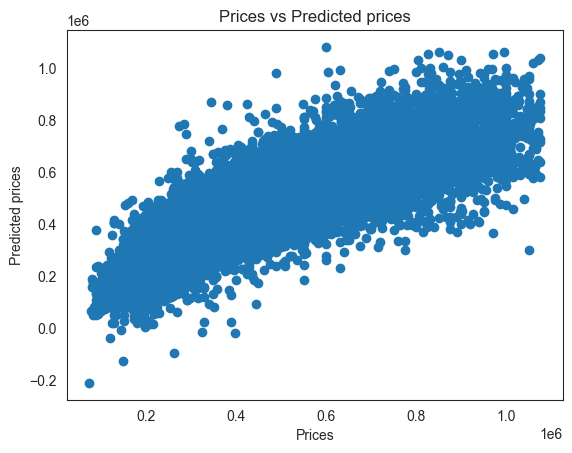

In [32]:
# Scatter plot of the actual prices versus the predicted prices

plot_predicted_vs_actual(y_train, y_pred)

In [33]:
def plot_predicted_vs_residuals(y_train, y_pred):
  # Create a scatter plot of the predicted prices versus the residuals (actual - predicted)
  plt.scatter(y_pred, y_train - y_pred)
  plt.title("Predicted vs residuals")
  plt.xlabel("Predicted")
  plt.ylabel("Residuals")
  plt.show()

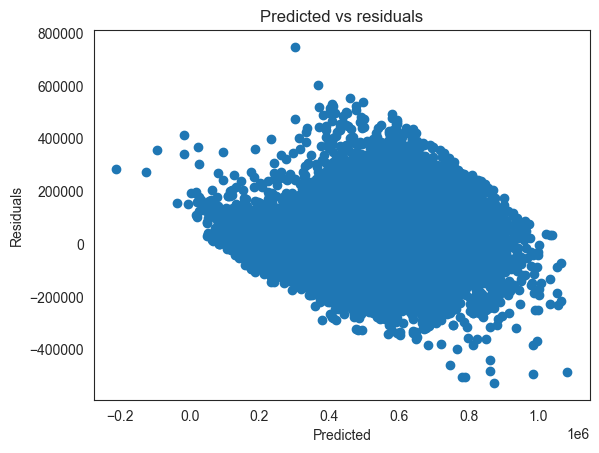

In [34]:
plot_predicted_vs_residuals(y_train, y_pred)

**The residuals are the errors that are not explained by the model.
If the residuals are randomly distributed around zero, it suggests that the model is a good fit for the data. On the other hand, if the residuals are not randomly distributed, it may indicate that the model is not a good fit for the data and that additional factors may need to be considered in the model.

# Model 2 : Decision Tree Regressor

### Model 2 :  Development

In [35]:
# Create a Decision Tree regressor
clf = tree.DecisionTreeRegressor(min_samples_split=13, max_depth=10, min_samples_leaf=10, max_leaf_nodes=320)

# Train the model using the training data
clf.fit(X_train, y_train)

# Predict the test data
y_pred = clf.predict(X_train)
# Predicting Test data with the model
y_test_pred = clf.predict(X_test)
# Model Metrics
acc_clf = metrics.r2_score(y_test, y_test_pred)
RMSE2T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

### Model 2 :  Evaluation

In [36]:
summary_statistics(clf, X_train, y_train, X_test, y_test)
print('R^2:', acc_clf)
print('RMSE:',RMSE2T)


Train set score: 0.8463599763811356
Test set score: 0.8015808610032387
Adjusted R^2: 0.8462357941554751
R^2: 0.8015808610032387
RMSE: 78315.45369147875


### Model 2 : Visualizing

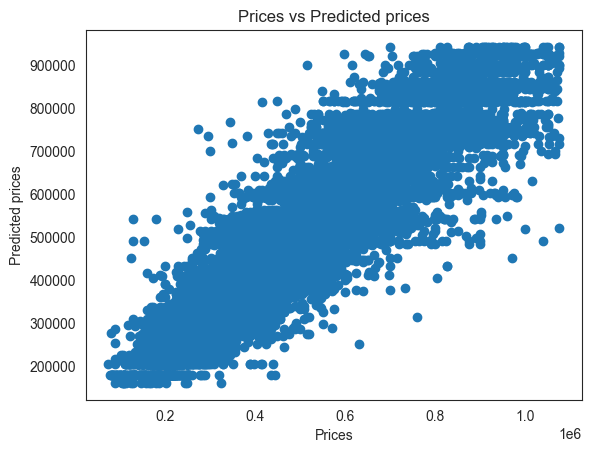

In [37]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

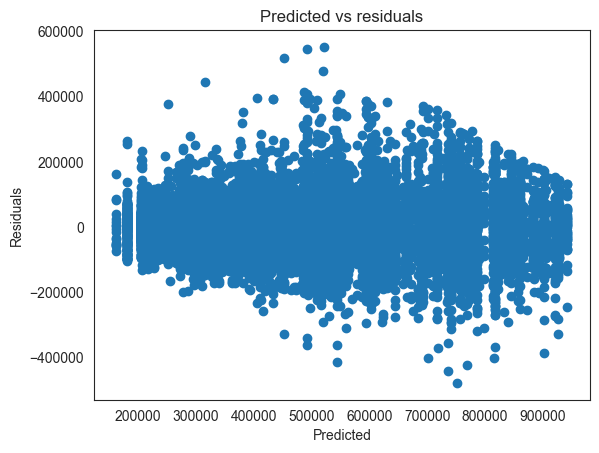

In [38]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

# Model 3 : Random Forest model

### Model 3 :  Development

In [39]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

# Fit the model to the training data with different hyperparameters
reg = RandomForestRegressor(n_estimators= 110, min_samples_split= 13, max_depth= 9) 
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model metrics
acc_reg = metrics.r2_score(y_test, y_test_pred)
RMSE3T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))


### Model 3: Best Paramters to use - using Randomized Search

#### *it will take a lot of time to run so we commented it.

In [40]:
# params = {'n_estimators':np.arange(100,200,10),'max_depth':np.arange(5,15),'min_samples_split':np.arange(1,10)}
# cv2 = RandomizedSearchCV(reg,params,cv=4,n_iter=25)
# cv2.fit(X_train, y_train)


In [41]:
# cv2.best_params_

#best parameters : {'n_estimators': 190, 'min_samples_split': 6, 'max_depth': 14}

### Model 3 :  Evaluation

In [42]:
summary_statistics(reg, X_train, y_train, X_test, y_test)
print('R^2:', acc_reg)
print('RMSE:',RMSE3T)

Train set score: 0.8731680676135055
Test set score: 0.8360962359350235
Adjusted R^2: 0.8730655534946088
R^2: 0.8360962359350235
RMSE: 71155.68276658503


### Model 3: Visualizing

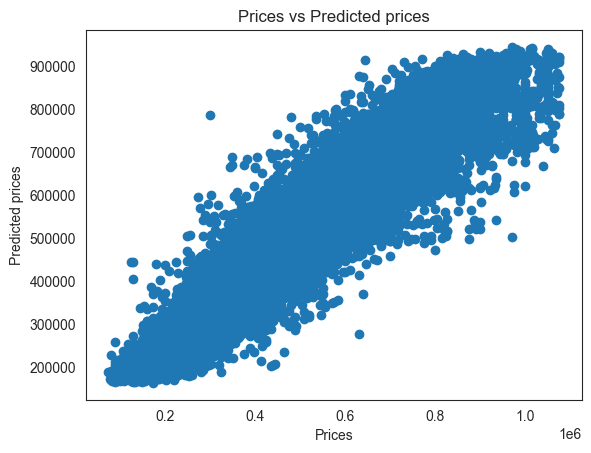

In [43]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

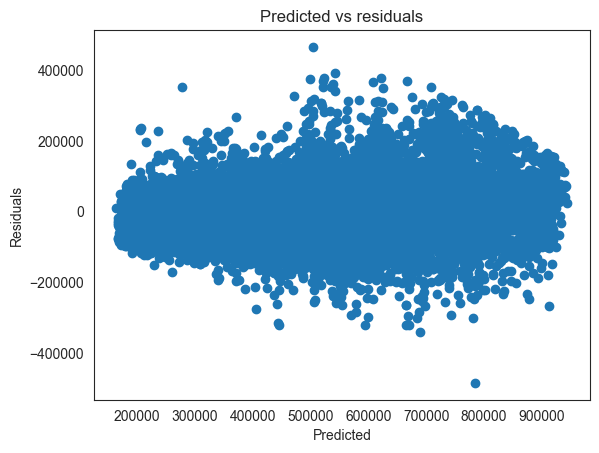

In [44]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

##   Model 4 : CatBoost model

###  Model 4 :  Development/Best parameters

#### *it will take a lot of time to run so we commented it.

In [45]:
# Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': np.arange(50, 200, 10),
#     'max_depth':np.arange(5,15),
#     'learning_rate': [0.1, 0.2, 0.3]
# }
# Create a randomized search object
#random_search = RandomizedSearchCV(cb, param_grid, cv=5, n_iter=10, scoring='neg_mean_squared_error')
# Fit the randomized search object to the training data
#random_search.fit(X_train, y_train)
# Print the best set of hyperparameters found
#print(random_search.best_params_)
#param_grid={'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.2}
# Use the best set of hyperparameters to create a model
# cb = CatBoostRegressor(**random_search.best_params_)


In [46]:
# Create a CatBoost Regressor
cb = CatBoostRegressor(n_estimators=170,max_depth=10,learning_rate=0.2)
# Fit the randomized search object to the training data
cb.fit(X_train, y_train)

# Model prediction on train data
y_pred = cb.predict(X_train)
# Fit the model to the training data
cb.fit(X_train, y_train)

# Model prediction on train data
y_pred = cb.predict(X_train)
# Predicting Test data with the model
y_test_pred = cb.predict(X_test)
# Model metrics
acc_cb = metrics.r2_score(y_test, y_test_pred)
RMSE4T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))


0:	learn: 172971.5014334	total: 146ms	remaining: 24.6s
1:	learn: 151304.0952475	total: 159ms	remaining: 13.4s
2:	learn: 135410.5350933	total: 174ms	remaining: 9.7s
3:	learn: 123012.3329196	total: 188ms	remaining: 7.79s
4:	learn: 113786.2488552	total: 196ms	remaining: 6.46s
5:	learn: 106959.1792152	total: 210ms	remaining: 5.73s
6:	learn: 99841.2835246	total: 223ms	remaining: 5.19s
7:	learn: 94390.4479100	total: 238ms	remaining: 4.82s
8:	learn: 90980.9005073	total: 251ms	remaining: 4.48s
9:	learn: 88031.7997169	total: 265ms	remaining: 4.25s
10:	learn: 85306.1507524	total: 279ms	remaining: 4.03s
11:	learn: 83171.5817456	total: 293ms	remaining: 3.85s
12:	learn: 81785.6442810	total: 306ms	remaining: 3.7s
13:	learn: 80762.4739770	total: 320ms	remaining: 3.56s
14:	learn: 79789.9690157	total: 332ms	remaining: 3.44s
15:	learn: 78961.6421442	total: 347ms	remaining: 3.34s
16:	learn: 77485.5748639	total: 360ms	remaining: 3.24s
17:	learn: 76647.8204755	total: 375ms	remaining: 3.17s
18:	learn: 76173

156:	learn: 50573.8974237	total: 2.25s	remaining: 186ms
157:	learn: 50486.2901867	total: 2.26s	remaining: 172ms
158:	learn: 50387.9756184	total: 2.27s	remaining: 157ms
159:	learn: 50291.1932820	total: 2.29s	remaining: 143ms
160:	learn: 50190.2897598	total: 2.3s	remaining: 129ms
161:	learn: 50105.7650033	total: 2.31s	remaining: 114ms
162:	learn: 50074.0987525	total: 2.33s	remaining: 100ms
163:	learn: 49989.4787716	total: 2.34s	remaining: 85.6ms
164:	learn: 49885.6818880	total: 2.35s	remaining: 71.3ms
165:	learn: 49806.7281240	total: 2.36s	remaining: 57ms
166:	learn: 49609.8335257	total: 2.38s	remaining: 42.7ms
167:	learn: 49553.6821924	total: 2.39s	remaining: 28.4ms
168:	learn: 49470.0447132	total: 2.4s	remaining: 14.2ms
169:	learn: 49392.0239963	total: 2.41s	remaining: 0us
0:	learn: 172971.5014334	total: 12.9ms	remaining: 2.18s
1:	learn: 151304.0952475	total: 25.6ms	remaining: 2.15s
2:	learn: 135410.5350933	total: 38.6ms	remaining: 2.15s
3:	learn: 123012.3329196	total: 52.9ms	remaining

141:	learn: 51987.9987229	total: 1.92s	remaining: 379ms
142:	learn: 51851.2876786	total: 1.94s	remaining: 366ms
143:	learn: 51700.7219523	total: 1.95s	remaining: 352ms
144:	learn: 51625.5393980	total: 1.96s	remaining: 338ms
145:	learn: 51503.4411063	total: 1.97s	remaining: 324ms
146:	learn: 51408.2858693	total: 1.99s	remaining: 311ms
147:	learn: 51345.0888526	total: 2s	remaining: 297ms
148:	learn: 51287.0479403	total: 2.01s	remaining: 284ms
149:	learn: 51246.1346075	total: 2.02s	remaining: 270ms
150:	learn: 51173.0146776	total: 2.04s	remaining: 256ms
151:	learn: 51085.6869480	total: 2.05s	remaining: 243ms
152:	learn: 50904.7104299	total: 2.06s	remaining: 229ms
153:	learn: 50833.6182456	total: 2.07s	remaining: 215ms
154:	learn: 50759.4802081	total: 2.08s	remaining: 202ms
155:	learn: 50652.2311149	total: 2.1s	remaining: 188ms
156:	learn: 50573.8974237	total: 2.11s	remaining: 175ms
157:	learn: 50486.2901867	total: 2.12s	remaining: 161ms
158:	learn: 50387.9756184	total: 2.14s	remaining: 14

In [47]:
# Save model to a pickle file
model = (cb, X_train, y_train)
pickle.dump(model, open('Price_prediction_model.pkl','wb'))

### Model 4: Visualizing

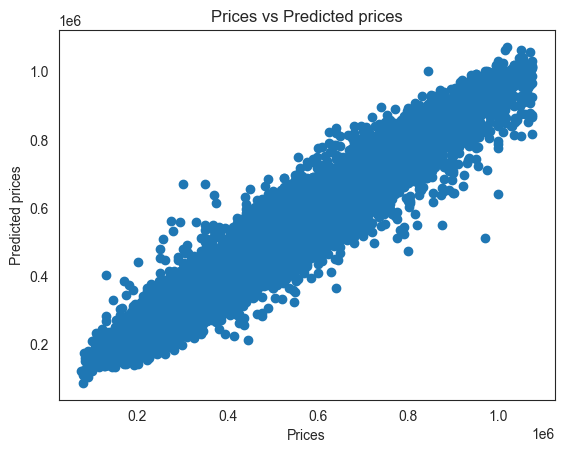

In [48]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

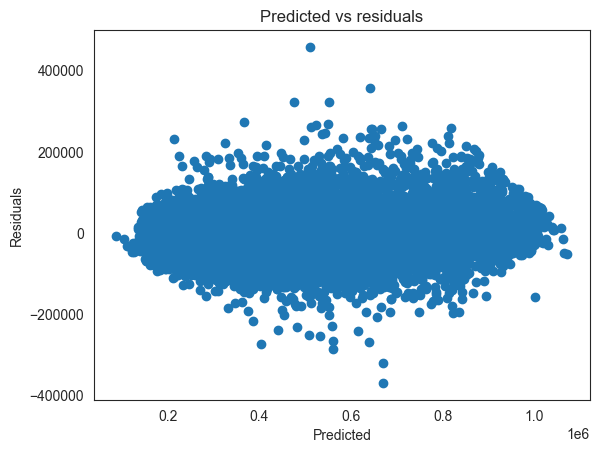

In [49]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

0:	learn: 176769.2055414	total: 16.9ms	remaining: 2.86s
1:	learn: 156023.8322325	total: 30.8ms	remaining: 2.59s
2:	learn: 141044.0253662	total: 46.8ms	remaining: 2.6s
3:	learn: 127530.8237633	total: 59.8ms	remaining: 2.48s
4:	learn: 117375.1575797	total: 70.7ms	remaining: 2.33s
5:	learn: 109769.3675106	total: 81.7ms	remaining: 2.23s
6:	learn: 103073.1465534	total: 92.2ms	remaining: 2.15s
7:	learn: 97918.4315301	total: 103ms	remaining: 2.08s
8:	learn: 93051.2155322	total: 115ms	remaining: 2.05s
9:	learn: 89962.2053944	total: 126ms	remaining: 2.01s
10:	learn: 86076.5150692	total: 136ms	remaining: 1.97s
11:	learn: 83121.6014399	total: 147ms	remaining: 1.93s
12:	learn: 80352.9218546	total: 158ms	remaining: 1.91s
13:	learn: 78079.9060297	total: 168ms	remaining: 1.88s
14:	learn: 75796.3843511	total: 181ms	remaining: 1.87s
15:	learn: 73570.0451199	total: 191ms	remaining: 1.84s
16:	learn: 71611.2230347	total: 201ms	remaining: 1.81s
17:	learn: 70408.3757675	total: 213ms	remaining: 1.8s
18:	lear

159:	learn: 16393.9092412	total: 1.7s	remaining: 106ms
160:	learn: 16271.0255513	total: 1.71s	remaining: 95.6ms
161:	learn: 16202.0940310	total: 1.72s	remaining: 85ms
162:	learn: 16076.7495948	total: 1.73s	remaining: 74.4ms
163:	learn: 15999.3709984	total: 1.74s	remaining: 63.7ms
164:	learn: 15986.9432487	total: 1.74s	remaining: 52.9ms
165:	learn: 15898.3856961	total: 1.75s	remaining: 42.3ms
166:	learn: 15757.8019421	total: 1.76s	remaining: 31.7ms
167:	learn: 15602.7760722	total: 1.77s	remaining: 21.1ms
168:	learn: 15467.0783423	total: 1.79s	remaining: 10.6ms
169:	learn: 15390.6996830	total: 1.79s	remaining: 0us
0:	learn: 175651.4279672	total: 11.2ms	remaining: 1.89s
1:	learn: 154041.4204000	total: 21.4ms	remaining: 1.79s
2:	learn: 138245.5249810	total: 31.7ms	remaining: 1.77s
3:	learn: 125627.9507576	total: 42.3ms	remaining: 1.75s
4:	learn: 115928.4126983	total: 53.7ms	remaining: 1.77s
5:	learn: 108339.5556365	total: 64.3ms	remaining: 1.76s
6:	learn: 102055.0910177	total: 75.6ms	remai

139:	learn: 38224.1984316	total: 1.55s	remaining: 331ms
140:	learn: 38120.2968852	total: 1.56s	remaining: 321ms
141:	learn: 38006.7302155	total: 1.57s	remaining: 309ms
142:	learn: 37940.9266277	total: 1.58s	remaining: 298ms
143:	learn: 37927.3082088	total: 1.59s	remaining: 287ms
144:	learn: 37885.8718324	total: 1.6s	remaining: 276ms
145:	learn: 37691.0227553	total: 1.61s	remaining: 265ms
146:	learn: 37613.5293838	total: 1.62s	remaining: 254ms
147:	learn: 37476.5225785	total: 1.63s	remaining: 242ms
148:	learn: 37308.6194552	total: 1.64s	remaining: 231ms
149:	learn: 37243.4090019	total: 1.65s	remaining: 220ms
150:	learn: 37059.8009498	total: 1.66s	remaining: 209ms
151:	learn: 36916.9801326	total: 1.67s	remaining: 198ms
152:	learn: 36842.6548091	total: 1.68s	remaining: 187ms
153:	learn: 36721.4598361	total: 1.69s	remaining: 176ms
154:	learn: 36561.2188544	total: 1.7s	remaining: 165ms
155:	learn: 36452.9327299	total: 1.71s	remaining: 154ms
156:	learn: 36369.7810407	total: 1.72s	remaining: 

129:	learn: 45840.5121963	total: 1.56s	remaining: 481ms
130:	learn: 45656.3452061	total: 1.57s	remaining: 469ms
131:	learn: 45514.8900507	total: 1.58s	remaining: 456ms
132:	learn: 45413.6211194	total: 1.59s	remaining: 444ms
133:	learn: 45298.8168411	total: 1.61s	remaining: 432ms
134:	learn: 45241.9327774	total: 1.62s	remaining: 420ms
135:	learn: 45096.5737776	total: 1.63s	remaining: 408ms
136:	learn: 44933.6208903	total: 1.64s	remaining: 396ms
137:	learn: 44807.6810263	total: 1.65s	remaining: 383ms
138:	learn: 44615.7533712	total: 1.66s	remaining: 371ms
139:	learn: 44539.4608802	total: 1.68s	remaining: 359ms
140:	learn: 44431.8468288	total: 1.69s	remaining: 347ms
141:	learn: 44339.6037753	total: 1.7s	remaining: 335ms
142:	learn: 44227.7301688	total: 1.71s	remaining: 323ms
143:	learn: 44132.4399553	total: 1.72s	remaining: 310ms
144:	learn: 43890.0731796	total: 1.73s	remaining: 299ms
145:	learn: 43719.6295359	total: 1.74s	remaining: 287ms
146:	learn: 43618.8568851	total: 1.75s	remaining:

111:	learn: 51189.4149042	total: 1.43s	remaining: 739ms
112:	learn: 51110.5802543	total: 1.44s	remaining: 728ms
113:	learn: 51037.4671199	total: 1.46s	remaining: 716ms
114:	learn: 50895.8259290	total: 1.47s	remaining: 703ms
115:	learn: 50781.2429297	total: 1.48s	remaining: 691ms
116:	learn: 50673.9625193	total: 1.5s	remaining: 677ms
117:	learn: 50591.2183122	total: 1.51s	remaining: 664ms
118:	learn: 50574.9172621	total: 1.52s	remaining: 652ms
119:	learn: 50344.6553634	total: 1.53s	remaining: 639ms
120:	learn: 50216.5882832	total: 1.54s	remaining: 626ms
121:	learn: 50108.1802196	total: 1.56s	remaining: 613ms
122:	learn: 49931.5926041	total: 1.57s	remaining: 600ms
123:	learn: 49780.5335581	total: 1.58s	remaining: 587ms
124:	learn: 49657.8619428	total: 1.59s	remaining: 574ms
125:	learn: 49497.7137744	total: 1.61s	remaining: 561ms
126:	learn: 49342.7506252	total: 1.62s	remaining: 549ms
127:	learn: 49245.7012541	total: 1.63s	remaining: 536ms
128:	learn: 49160.7479545	total: 1.65s	remaining:

97:	learn: 55141.1054548	total: 1.28s	remaining: 943ms
98:	learn: 54990.5403762	total: 1.3s	remaining: 930ms
99:	learn: 54926.8200429	total: 1.31s	remaining: 917ms
100:	learn: 54772.5013363	total: 1.32s	remaining: 903ms
101:	learn: 54668.7704926	total: 1.33s	remaining: 889ms
102:	learn: 54470.5606823	total: 1.35s	remaining: 876ms
103:	learn: 54372.1353716	total: 1.36s	remaining: 863ms
104:	learn: 54355.9465430	total: 1.37s	remaining: 849ms
105:	learn: 54182.6058041	total: 1.38s	remaining: 835ms
106:	learn: 54065.4195312	total: 1.4s	remaining: 822ms
107:	learn: 53920.7620641	total: 1.41s	remaining: 808ms
108:	learn: 53669.3747790	total: 1.42s	remaining: 795ms
109:	learn: 53558.1592901	total: 1.43s	remaining: 781ms
110:	learn: 53363.2169405	total: 1.44s	remaining: 768ms
111:	learn: 53305.7787139	total: 1.46s	remaining: 754ms
112:	learn: 53183.3660829	total: 1.47s	remaining: 740ms
113:	learn: 53058.8515719	total: 1.48s	remaining: 727ms
114:	learn: 52948.3036392	total: 1.49s	remaining: 714

86:	learn: 30829.1286461	total: 919ms	remaining: 876ms
87:	learn: 30591.6381092	total: 929ms	remaining: 866ms
88:	learn: 30304.0597890	total: 939ms	remaining: 855ms
89:	learn: 30059.9049346	total: 949ms	remaining: 844ms
90:	learn: 29826.4621180	total: 959ms	remaining: 832ms
91:	learn: 29379.0511489	total: 969ms	remaining: 821ms
92:	learn: 29192.7077386	total: 979ms	remaining: 810ms
93:	learn: 29006.2564947	total: 988ms	remaining: 799ms
94:	learn: 28829.3215201	total: 1000ms	remaining: 789ms
95:	learn: 28500.6739190	total: 1.01s	remaining: 778ms
96:	learn: 28346.6255312	total: 1.02s	remaining: 767ms
97:	learn: 27971.2692443	total: 1.03s	remaining: 757ms
98:	learn: 27847.8783090	total: 1.04s	remaining: 746ms
99:	learn: 27524.6017584	total: 1.05s	remaining: 735ms
100:	learn: 27310.3620193	total: 1.06s	remaining: 724ms
101:	learn: 27122.0393466	total: 1.07s	remaining: 714ms
102:	learn: 26888.0971294	total: 1.08s	remaining: 703ms
103:	learn: 26653.2179108	total: 1.09s	remaining: 692ms
104:	

69:	learn: 52530.7555995	total: 783ms	remaining: 1.12s
70:	learn: 52312.6605709	total: 795ms	remaining: 1.11s
71:	learn: 52081.3413644	total: 806ms	remaining: 1.1s
72:	learn: 51793.8283437	total: 818ms	remaining: 1.09s
73:	learn: 51475.5149990	total: 828ms	remaining: 1.07s
74:	learn: 51258.6570728	total: 839ms	remaining: 1.06s
75:	learn: 51076.0259084	total: 849ms	remaining: 1.05s
76:	learn: 50840.6798061	total: 861ms	remaining: 1.04s
77:	learn: 50583.8405349	total: 871ms	remaining: 1.03s
78:	learn: 50423.3684854	total: 881ms	remaining: 1.01s
79:	learn: 50147.7727419	total: 892ms	remaining: 1s
80:	learn: 49800.9704423	total: 902ms	remaining: 991ms
81:	learn: 49548.0513245	total: 914ms	remaining: 981ms
82:	learn: 49278.9178169	total: 924ms	remaining: 969ms
83:	learn: 48968.4822260	total: 934ms	remaining: 957ms
84:	learn: 48683.0217904	total: 945ms	remaining: 945ms
85:	learn: 48455.8795059	total: 955ms	remaining: 933ms
86:	learn: 48132.3935613	total: 967ms	remaining: 923ms
87:	learn: 479

61:	learn: 58936.1931342	total: 762ms	remaining: 1.33s
62:	learn: 58671.2099314	total: 778ms	remaining: 1.32s
63:	learn: 58490.8309565	total: 793ms	remaining: 1.31s
64:	learn: 58249.7797291	total: 811ms	remaining: 1.31s
65:	learn: 57916.4888155	total: 824ms	remaining: 1.3s
66:	learn: 57664.9593243	total: 837ms	remaining: 1.29s
67:	learn: 57366.0043660	total: 849ms	remaining: 1.27s
68:	learn: 57038.6977298	total: 861ms	remaining: 1.26s
69:	learn: 56864.8384902	total: 874ms	remaining: 1.25s
70:	learn: 56673.8582783	total: 886ms	remaining: 1.23s
71:	learn: 56402.8407393	total: 896ms	remaining: 1.22s
72:	learn: 56168.5729735	total: 908ms	remaining: 1.21s
73:	learn: 55998.5005769	total: 919ms	remaining: 1.19s
74:	learn: 55731.9047265	total: 931ms	remaining: 1.18s
75:	learn: 55408.2194648	total: 941ms	remaining: 1.16s
76:	learn: 54988.6354132	total: 952ms	remaining: 1.15s
77:	learn: 54864.1092540	total: 963ms	remaining: 1.14s
78:	learn: 54606.0032825	total: 973ms	remaining: 1.12s
79:	learn: 

43:	learn: 64951.6794151	total: 561ms	remaining: 1.61s
44:	learn: 64746.7228323	total: 577ms	remaining: 1.6s
45:	learn: 64499.7237149	total: 596ms	remaining: 1.61s
46:	learn: 64286.4814445	total: 614ms	remaining: 1.61s
47:	learn: 63987.2963870	total: 634ms	remaining: 1.61s
48:	learn: 63633.6617718	total: 649ms	remaining: 1.6s
49:	learn: 63272.0663986	total: 664ms	remaining: 1.59s
50:	learn: 62835.2699218	total: 685ms	remaining: 1.6s
51:	learn: 62653.8498994	total: 698ms	remaining: 1.58s
52:	learn: 62430.4470433	total: 710ms	remaining: 1.57s
53:	learn: 62244.4924755	total: 722ms	remaining: 1.55s
54:	learn: 61826.1276332	total: 737ms	remaining: 1.54s
55:	learn: 61657.9161324	total: 749ms	remaining: 1.52s
56:	learn: 61466.8512491	total: 762ms	remaining: 1.51s
57:	learn: 61311.5731517	total: 774ms	remaining: 1.49s
58:	learn: 61065.4994064	total: 788ms	remaining: 1.48s
59:	learn: 60757.3309676	total: 800ms	remaining: 1.47s
60:	learn: 60558.2271939	total: 812ms	remaining: 1.45s
61:	learn: 60

25:	learn: 73679.7001034	total: 352ms	remaining: 1.95s
26:	learn: 72555.2566874	total: 366ms	remaining: 1.94s
27:	learn: 72163.9961225	total: 380ms	remaining: 1.93s
28:	learn: 71756.6302481	total: 394ms	remaining: 1.91s
29:	learn: 71172.4954045	total: 407ms	remaining: 1.9s
30:	learn: 70902.1865688	total: 419ms	remaining: 1.88s
31:	learn: 70585.6295367	total: 431ms	remaining: 1.86s
32:	learn: 69815.1800099	total: 444ms	remaining: 1.84s
33:	learn: 69538.0180948	total: 455ms	remaining: 1.82s
34:	learn: 68946.0954599	total: 467ms	remaining: 1.8s
35:	learn: 68478.0376823	total: 479ms	remaining: 1.78s
36:	learn: 68249.5766603	total: 491ms	remaining: 1.76s
37:	learn: 68038.8777798	total: 503ms	remaining: 1.75s
38:	learn: 67862.5685395	total: 515ms	remaining: 1.73s
39:	learn: 67643.5994319	total: 527ms	remaining: 1.71s
40:	learn: 67440.8945819	total: 541ms	remaining: 1.7s
41:	learn: 67061.2046435	total: 552ms	remaining: 1.68s
42:	learn: 66504.6446627	total: 564ms	remaining: 1.67s
43:	learn: 66

20:	learn: 71507.8160614	total: 219ms	remaining: 1.55s
21:	learn: 70719.7605520	total: 229ms	remaining: 1.54s
22:	learn: 68730.5677794	total: 239ms	remaining: 1.52s
23:	learn: 67724.4215526	total: 248ms	remaining: 1.51s
24:	learn: 67038.4697327	total: 258ms	remaining: 1.5s
25:	learn: 66406.2638804	total: 268ms	remaining: 1.49s
26:	learn: 65665.4276359	total: 278ms	remaining: 1.47s
27:	learn: 64565.2340288	total: 289ms	remaining: 1.46s
28:	learn: 63853.9587179	total: 300ms	remaining: 1.46s
29:	learn: 62452.3439879	total: 310ms	remaining: 1.44s
30:	learn: 60994.2447098	total: 319ms	remaining: 1.43s
31:	learn: 60567.1038606	total: 331ms	remaining: 1.43s
32:	learn: 59040.5328117	total: 340ms	remaining: 1.41s
33:	learn: 58852.5815682	total: 341ms	remaining: 1.36s
34:	learn: 58066.6954355	total: 351ms	remaining: 1.35s
35:	learn: 56895.4306350	total: 360ms	remaining: 1.34s
36:	learn: 56309.6088730	total: 371ms	remaining: 1.33s
37:	learn: 55840.1125672	total: 382ms	remaining: 1.33s
38:	learn: 

10:	learn: 88798.9211669	total: 147ms	remaining: 2.13s
11:	learn: 85496.3954243	total: 162ms	remaining: 2.13s
12:	learn: 83676.5017134	total: 177ms	remaining: 2.13s
13:	learn: 81410.6900500	total: 190ms	remaining: 2.12s
14:	learn: 80165.9957732	total: 202ms	remaining: 2.09s
15:	learn: 78962.6831382	total: 214ms	remaining: 2.06s
16:	learn: 77942.6084599	total: 224ms	remaining: 2.02s
17:	learn: 76847.7255319	total: 235ms	remaining: 1.98s
18:	learn: 76026.6450471	total: 245ms	remaining: 1.95s
19:	learn: 75349.1206090	total: 256ms	remaining: 1.92s
20:	learn: 74036.3909347	total: 266ms	remaining: 1.89s
21:	learn: 73460.4150129	total: 276ms	remaining: 1.85s
22:	learn: 72809.0444583	total: 286ms	remaining: 1.82s
23:	learn: 72367.0999351	total: 298ms	remaining: 1.81s
24:	learn: 71865.1688405	total: 308ms	remaining: 1.79s
25:	learn: 71197.1877898	total: 318ms	remaining: 1.76s
26:	learn: 70435.7399250	total: 329ms	remaining: 1.74s
27:	learn: 70108.1710562	total: 339ms	remaining: 1.72s
28:	learn:

167:	learn: 33837.1306195	total: 1.84s	remaining: 21.9ms
168:	learn: 33698.6919453	total: 1.85s	remaining: 11ms
169:	learn: 33575.8112743	total: 1.86s	remaining: 0us
0:	learn: 174807.8763743	total: 11ms	remaining: 1.86s
1:	learn: 153302.8143986	total: 23ms	remaining: 1.93s
2:	learn: 137502.6118033	total: 34.5ms	remaining: 1.92s
3:	learn: 124558.8217398	total: 45.1ms	remaining: 1.87s
4:	learn: 115238.5486531	total: 57.2ms	remaining: 1.89s
5:	learn: 107140.0387902	total: 68ms	remaining: 1.86s
6:	learn: 101897.2679851	total: 78.6ms	remaining: 1.83s
7:	learn: 97396.8221104	total: 90.6ms	remaining: 1.83s
8:	learn: 93160.5240138	total: 101ms	remaining: 1.81s
9:	learn: 90628.2013410	total: 114ms	remaining: 1.83s
10:	learn: 88549.1073550	total: 127ms	remaining: 1.83s
11:	learn: 85626.7964187	total: 142ms	remaining: 1.86s
12:	learn: 83341.8385270	total: 155ms	remaining: 1.87s
13:	learn: 81929.9867313	total: 172ms	remaining: 1.92s
14:	learn: 79842.5351870	total: 184ms	remaining: 1.9s
15:	learn: 

161:	learn: 42653.3585338	total: 1.85s	remaining: 91.6ms
162:	learn: 42576.1034943	total: 1.86s	remaining: 80.1ms
163:	learn: 42544.0361145	total: 1.88s	remaining: 68.6ms
164:	learn: 42421.4664323	total: 1.89s	remaining: 57.2ms
165:	learn: 42270.3877010	total: 1.9s	remaining: 45.7ms
166:	learn: 42199.0238825	total: 1.91s	remaining: 34.3ms
167:	learn: 42108.0938691	total: 1.92s	remaining: 22.9ms
168:	learn: 41931.5296590	total: 1.93s	remaining: 11.4ms
169:	learn: 41842.3184220	total: 1.94s	remaining: 0us
0:	learn: 174439.2762242	total: 14.9ms	remaining: 2.52s
1:	learn: 152896.2141797	total: 27ms	remaining: 2.27s
2:	learn: 137580.9876770	total: 39.6ms	remaining: 2.21s
3:	learn: 124667.4647890	total: 51.4ms	remaining: 2.13s
4:	learn: 114635.6552731	total: 63.6ms	remaining: 2.1s
5:	learn: 106648.4331122	total: 77.7ms	remaining: 2.12s
6:	learn: 100482.8213645	total: 90.3ms	remaining: 2.1s
7:	learn: 96149.9605953	total: 107ms	remaining: 2.16s
8:	learn: 92408.9356516	total: 121ms	remaining: 2

144:	learn: 47241.5655434	total: 1.8s	remaining: 311ms
145:	learn: 47167.9196600	total: 1.82s	remaining: 299ms
146:	learn: 47033.7018590	total: 1.83s	remaining: 286ms
147:	learn: 46868.9139467	total: 1.84s	remaining: 274ms
148:	learn: 46703.4498944	total: 1.86s	remaining: 262ms
149:	learn: 46568.0250030	total: 1.87s	remaining: 249ms
150:	learn: 46426.7503369	total: 1.88s	remaining: 237ms
151:	learn: 46368.4260897	total: 1.89s	remaining: 224ms
152:	learn: 46215.5119092	total: 1.91s	remaining: 212ms
153:	learn: 46112.9845953	total: 1.92s	remaining: 199ms
154:	learn: 46027.0638858	total: 1.93s	remaining: 187ms
155:	learn: 45899.7153036	total: 1.94s	remaining: 174ms
156:	learn: 45820.6044425	total: 1.95s	remaining: 162ms
157:	learn: 45761.2856821	total: 1.96s	remaining: 149ms
158:	learn: 45656.8240250	total: 1.97s	remaining: 137ms
159:	learn: 45591.4789883	total: 1.99s	remaining: 124ms
160:	learn: 45503.7994956	total: 2s	remaining: 112ms
161:	learn: 45444.9573024	total: 2.01s	remaining: 99

136:	learn: 51031.3236991	total: 1.73s	remaining: 418ms
137:	learn: 50887.8460250	total: 1.75s	remaining: 405ms
138:	learn: 50821.2464781	total: 1.76s	remaining: 392ms
139:	learn: 50634.1746571	total: 1.77s	remaining: 380ms
140:	learn: 50503.2323751	total: 1.78s	remaining: 367ms
141:	learn: 50383.8705918	total: 1.79s	remaining: 354ms
142:	learn: 50221.5444757	total: 1.81s	remaining: 341ms
143:	learn: 50082.2385277	total: 1.82s	remaining: 328ms
144:	learn: 49999.1687539	total: 1.83s	remaining: 316ms
145:	learn: 49826.0941859	total: 1.84s	remaining: 303ms
146:	learn: 49661.4753283	total: 1.86s	remaining: 291ms
147:	learn: 49524.8541650	total: 1.87s	remaining: 278ms
148:	learn: 49361.8281640	total: 1.89s	remaining: 266ms
149:	learn: 49289.5652589	total: 1.91s	remaining: 254ms
150:	learn: 49173.1255751	total: 1.92s	remaining: 242ms
151:	learn: 49114.3043966	total: 1.94s	remaining: 229ms
152:	learn: 48953.9878912	total: 1.96s	remaining: 217ms
153:	learn: 48887.0847075	total: 1.98s	remaining

134:	learn: 20843.6626249	total: 1.39s	remaining: 361ms
135:	learn: 20747.4559900	total: 1.4s	remaining: 351ms
136:	learn: 20603.6813271	total: 1.42s	remaining: 341ms
137:	learn: 20464.1800869	total: 1.43s	remaining: 331ms
138:	learn: 20220.8916666	total: 1.44s	remaining: 320ms
139:	learn: 20100.4838336	total: 1.45s	remaining: 310ms
140:	learn: 20017.9859767	total: 1.46s	remaining: 300ms
141:	learn: 19850.0950009	total: 1.47s	remaining: 289ms
142:	learn: 19734.9852946	total: 1.48s	remaining: 279ms
143:	learn: 19550.9115003	total: 1.49s	remaining: 269ms
144:	learn: 19484.4212548	total: 1.5s	remaining: 258ms
145:	learn: 19336.3811181	total: 1.51s	remaining: 248ms
146:	learn: 19227.9479905	total: 1.52s	remaining: 237ms
147:	learn: 19009.9566802	total: 1.53s	remaining: 227ms
148:	learn: 18810.2964274	total: 1.54s	remaining: 217ms
149:	learn: 18730.4241962	total: 1.54s	remaining: 206ms
150:	learn: 18609.3519014	total: 1.55s	remaining: 195ms
151:	learn: 18468.4412598	total: 1.56s	remaining: 

118:	learn: 41090.8518913	total: 1.28s	remaining: 551ms
119:	learn: 40869.5811512	total: 1.3s	remaining: 540ms
120:	learn: 40667.8637709	total: 1.31s	remaining: 530ms
121:	learn: 40547.0654655	total: 1.32s	remaining: 519ms
122:	learn: 40383.3716148	total: 1.33s	remaining: 508ms
123:	learn: 40242.7612549	total: 1.34s	remaining: 497ms
124:	learn: 40056.1561764	total: 1.35s	remaining: 486ms
125:	learn: 39765.2367162	total: 1.36s	remaining: 475ms
126:	learn: 39559.3935186	total: 1.37s	remaining: 464ms
127:	learn: 39405.7399240	total: 1.38s	remaining: 453ms
128:	learn: 39281.2819408	total: 1.39s	remaining: 442ms
129:	learn: 39100.1713496	total: 1.4s	remaining: 431ms
130:	learn: 38961.1807962	total: 1.41s	remaining: 421ms
131:	learn: 38630.7111411	total: 1.42s	remaining: 410ms
132:	learn: 38491.2073220	total: 1.43s	remaining: 399ms
133:	learn: 38313.3087364	total: 1.44s	remaining: 388ms
134:	learn: 38139.8966891	total: 1.45s	remaining: 377ms
135:	learn: 37982.4612240	total: 1.47s	remaining: 

110:	learn: 49828.3266978	total: 1.25s	remaining: 668ms
111:	learn: 49716.4889518	total: 1.27s	remaining: 656ms
112:	learn: 49534.5375047	total: 1.28s	remaining: 645ms
113:	learn: 49389.6201351	total: 1.29s	remaining: 634ms
114:	learn: 49317.9650104	total: 1.3s	remaining: 622ms
115:	learn: 49093.1930489	total: 1.31s	remaining: 611ms
116:	learn: 48873.1563077	total: 1.32s	remaining: 600ms
117:	learn: 48788.0023291	total: 1.33s	remaining: 588ms
118:	learn: 48630.2052650	total: 1.34s	remaining: 577ms
119:	learn: 48554.4999050	total: 1.36s	remaining: 566ms
120:	learn: 48394.4627638	total: 1.37s	remaining: 554ms
121:	learn: 48243.3243692	total: 1.38s	remaining: 542ms
122:	learn: 48151.1450123	total: 1.39s	remaining: 531ms
123:	learn: 48049.6613701	total: 1.4s	remaining: 520ms
124:	learn: 47932.0673447	total: 1.41s	remaining: 509ms
125:	learn: 47718.3918196	total: 1.42s	remaining: 497ms
126:	learn: 47561.9551138	total: 1.44s	remaining: 486ms
127:	learn: 47407.6089608	total: 1.45s	remaining: 

95:	learn: 54005.8761466	total: 1.2s	remaining: 924ms
96:	learn: 53779.5228688	total: 1.21s	remaining: 912ms
97:	learn: 53569.6873661	total: 1.22s	remaining: 899ms
98:	learn: 53419.3611944	total: 1.24s	remaining: 886ms
99:	learn: 53340.1486090	total: 1.25s	remaining: 875ms
100:	learn: 53148.8636819	total: 1.26s	remaining: 861ms
101:	learn: 53023.5312776	total: 1.27s	remaining: 848ms
102:	learn: 52881.8125887	total: 1.28s	remaining: 836ms
103:	learn: 52689.6815378	total: 1.3s	remaining: 823ms
104:	learn: 52536.9997699	total: 1.31s	remaining: 809ms
105:	learn: 52384.1679032	total: 1.32s	remaining: 796ms
106:	learn: 52225.7988001	total: 1.33s	remaining: 783ms
107:	learn: 52011.4209811	total: 1.34s	remaining: 770ms
108:	learn: 51806.8572631	total: 1.35s	remaining: 758ms
109:	learn: 51631.7237435	total: 1.36s	remaining: 745ms
110:	learn: 51454.0808174	total: 1.38s	remaining: 733ms
111:	learn: 51330.7523249	total: 1.39s	remaining: 720ms
112:	learn: 51178.0798894	total: 1.4s	remaining: 707ms


74:	learn: 59230.2230273	total: 953ms	remaining: 1.21s
75:	learn: 59023.7000507	total: 966ms	remaining: 1.2s
76:	learn: 58773.2346569	total: 978ms	remaining: 1.18s
77:	learn: 58646.5358644	total: 991ms	remaining: 1.17s
78:	learn: 58550.0430260	total: 1s	remaining: 1.16s
79:	learn: 58442.7622245	total: 1.02s	remaining: 1.14s
80:	learn: 58262.7928133	total: 1.03s	remaining: 1.13s
81:	learn: 58129.1363518	total: 1.04s	remaining: 1.12s
82:	learn: 58038.1620274	total: 1.05s	remaining: 1.1s
83:	learn: 57833.3425388	total: 1.07s	remaining: 1.09s
84:	learn: 57738.9343411	total: 1.08s	remaining: 1.08s
85:	learn: 57583.6953619	total: 1.09s	remaining: 1.07s
86:	learn: 57477.6971786	total: 1.1s	remaining: 1.05s
87:	learn: 57341.7548858	total: 1.11s	remaining: 1.04s
88:	learn: 57126.3219362	total: 1.13s	remaining: 1.03s
89:	learn: 57048.7713095	total: 1.14s	remaining: 1.01s
90:	learn: 56932.4646720	total: 1.15s	remaining: 1s
91:	learn: 56845.4056975	total: 1.17s	remaining: 989ms
92:	learn: 56732.37

61:	learn: 39816.3463428	total: 651ms	remaining: 1.13s
62:	learn: 39359.2326040	total: 662ms	remaining: 1.12s
63:	learn: 38687.7739169	total: 671ms	remaining: 1.11s
64:	learn: 38332.8481279	total: 681ms	remaining: 1.1s
65:	learn: 37968.3171099	total: 693ms	remaining: 1.09s
66:	learn: 37506.8494283	total: 703ms	remaining: 1.08s
67:	learn: 37093.1995414	total: 713ms	remaining: 1.07s
68:	learn: 36753.5551984	total: 723ms	remaining: 1.06s
69:	learn: 36425.6913826	total: 733ms	remaining: 1.05s
70:	learn: 36162.8996008	total: 742ms	remaining: 1.03s
71:	learn: 35823.7713982	total: 754ms	remaining: 1.02s
72:	learn: 35267.3827396	total: 764ms	remaining: 1.01s
73:	learn: 34900.6785229	total: 773ms	remaining: 1s
74:	learn: 34616.5121045	total: 785ms	remaining: 994ms
75:	learn: 34264.3908520	total: 794ms	remaining: 983ms
76:	learn: 34014.9023138	total: 804ms	remaining: 971ms
77:	learn: 33720.9603212	total: 814ms	remaining: 960ms
78:	learn: 33320.3112126	total: 824ms	remaining: 949ms
79:	learn: 330

47:	learn: 60106.7788711	total: 512ms	remaining: 1.3s
48:	learn: 59655.9868944	total: 523ms	remaining: 1.29s
49:	learn: 59204.1112084	total: 533ms	remaining: 1.28s
50:	learn: 58917.1212688	total: 543ms	remaining: 1.27s
51:	learn: 58658.8226119	total: 553ms	remaining: 1.25s
52:	learn: 58318.4123735	total: 563ms	remaining: 1.24s
53:	learn: 57861.9725768	total: 573ms	remaining: 1.23s
54:	learn: 57356.9934137	total: 585ms	remaining: 1.22s
55:	learn: 57040.0241675	total: 597ms	remaining: 1.21s
56:	learn: 56763.1968946	total: 608ms	remaining: 1.21s
57:	learn: 56186.6096408	total: 623ms	remaining: 1.2s
58:	learn: 55731.5993672	total: 635ms	remaining: 1.19s
59:	learn: 55369.1570169	total: 649ms	remaining: 1.19s
60:	learn: 54937.0049637	total: 663ms	remaining: 1.18s
61:	learn: 54456.8469278	total: 676ms	remaining: 1.18s
62:	learn: 54111.4057409	total: 687ms	remaining: 1.17s
63:	learn: 53808.2470803	total: 703ms	remaining: 1.16s
64:	learn: 53406.4734428	total: 714ms	remaining: 1.15s
65:	learn: 5

26:	learn: 72279.4492845	total: 294ms	remaining: 1.56s
27:	learn: 71999.5139211	total: 305ms	remaining: 1.55s
28:	learn: 71642.2764920	total: 317ms	remaining: 1.54s
29:	learn: 70622.9784225	total: 328ms	remaining: 1.53s
30:	learn: 70407.0329350	total: 339ms	remaining: 1.52s
31:	learn: 69787.2705401	total: 350ms	remaining: 1.51s
32:	learn: 69369.1650896	total: 362ms	remaining: 1.5s
33:	learn: 68870.4744290	total: 374ms	remaining: 1.5s
34:	learn: 68272.8397007	total: 388ms	remaining: 1.5s
35:	learn: 68214.2573536	total: 389ms	remaining: 1.45s
36:	learn: 67876.8425635	total: 402ms	remaining: 1.44s
37:	learn: 67602.8124306	total: 414ms	remaining: 1.44s
38:	learn: 67195.3871487	total: 428ms	remaining: 1.44s
39:	learn: 66683.0914407	total: 440ms	remaining: 1.43s
40:	learn: 66347.3107584	total: 451ms	remaining: 1.42s
41:	learn: 66068.3009060	total: 463ms	remaining: 1.41s
42:	learn: 65714.6641924	total: 474ms	remaining: 1.4s
43:	learn: 65261.0603297	total: 486ms	remaining: 1.39s
44:	learn: 651

13:	learn: 79791.5869024	total: 176ms	remaining: 1.97s
14:	learn: 78879.5600478	total: 190ms	remaining: 1.96s
15:	learn: 78098.9222363	total: 203ms	remaining: 1.95s
16:	learn: 77385.3425517	total: 215ms	remaining: 1.94s
17:	learn: 76654.8670476	total: 229ms	remaining: 1.93s
18:	learn: 75608.0265233	total: 242ms	remaining: 1.92s
19:	learn: 74994.3720110	total: 256ms	remaining: 1.92s
20:	learn: 74573.8015367	total: 269ms	remaining: 1.91s
21:	learn: 73708.7244364	total: 284ms	remaining: 1.91s
22:	learn: 73380.0732450	total: 297ms	remaining: 1.9s
23:	learn: 72575.0868883	total: 312ms	remaining: 1.9s
24:	learn: 72211.8245717	total: 325ms	remaining: 1.89s
25:	learn: 71985.0085953	total: 340ms	remaining: 1.88s
26:	learn: 71387.7068651	total: 353ms	remaining: 1.87s
27:	learn: 70960.7967466	total: 365ms	remaining: 1.85s
28:	learn: 70389.8545325	total: 378ms	remaining: 1.84s
29:	learn: 70025.6373188	total: 391ms	remaining: 1.82s
30:	learn: 69673.3060633	total: 405ms	remaining: 1.81s
31:	learn: 6

0:	learn: 173774.7753075	total: 13.5ms	remaining: 2.29s
1:	learn: 152273.5325505	total: 25.5ms	remaining: 2.14s
2:	learn: 135340.7847683	total: 38ms	remaining: 2.11s
3:	learn: 122118.4508127	total: 51.4ms	remaining: 2.13s
4:	learn: 113516.2257135	total: 58.1ms	remaining: 1.92s
5:	learn: 105756.2125750	total: 70.1ms	remaining: 1.92s
6:	learn: 99514.6541910	total: 82ms	remaining: 1.91s
7:	learn: 95362.8123880	total: 94.1ms	remaining: 1.91s
8:	learn: 92010.7523353	total: 106ms	remaining: 1.9s
9:	learn: 88817.6924096	total: 118ms	remaining: 1.89s
10:	learn: 86978.3878844	total: 133ms	remaining: 1.92s
11:	learn: 85101.6538581	total: 145ms	remaining: 1.91s
12:	learn: 83558.0382350	total: 158ms	remaining: 1.9s
13:	learn: 82440.5529836	total: 169ms	remaining: 1.89s
14:	learn: 80843.6607403	total: 182ms	remaining: 1.88s
15:	learn: 79973.7790812	total: 195ms	remaining: 1.87s
16:	learn: 79289.8253792	total: 208ms	remaining: 1.87s
17:	learn: 78057.1491795	total: 220ms	remaining: 1.86s
18:	learn: 7

161:	learn: 48198.0898215	total: 2.14s	remaining: 106ms
162:	learn: 48082.5948873	total: 2.15s	remaining: 92.6ms
163:	learn: 47979.9260471	total: 2.17s	remaining: 79.3ms
164:	learn: 47892.2623559	total: 2.18s	remaining: 66.1ms
165:	learn: 47807.4712455	total: 2.19s	remaining: 52.8ms
166:	learn: 47682.2353697	total: 2.21s	remaining: 39.6ms
167:	learn: 47584.1100921	total: 2.22s	remaining: 26.4ms
168:	learn: 47491.8056057	total: 2.23s	remaining: 13.2ms
169:	learn: 47397.1512560	total: 2.25s	remaining: 0us


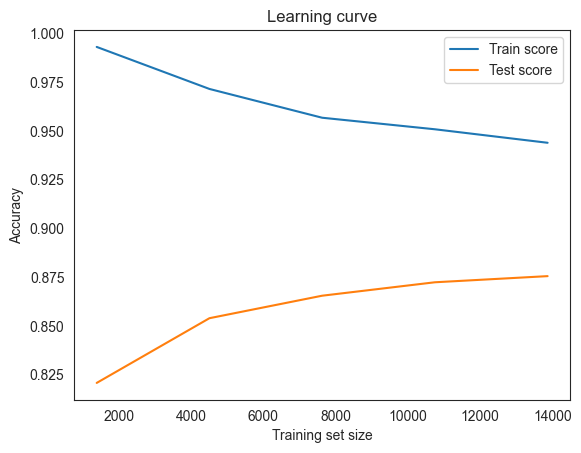

In [50]:
# use learning_curve to get train and test scores for a range of training set sizes
train_sizes, train_scores, test_scores = learning_curve(cb, X_train, y_train, cv=5)
# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
plt.legend(loc='best')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve')
plt.show()

###  Model 4 :  Evaluation

In [51]:
summary_statistics(cb, X_train, y_train, X_test, y_test)
print('R^2:', acc_cb)
print('RMSE:',RMSE4T)

Train set score: 0.9388884815116125
Test set score: 0.8768963768745451
Adjusted R^2: 0.9388390870621675
R^2: 0.8768963768745451
RMSE: 49392.02399630355


## Models evaluation summary

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree' ,'Random Forest','Catboost'], 'RMSE' : [RMSE1T,RMSE2T,RMSE3T,RMSE4T], 
    'R2 Score': [acc_lm*100, acc_clf*100,acc_reg*100,acc_cb*100]})
models.sort_values(by='R2 Score', ascending=False)

,Model,RMSE,R2 Score
3,Catboost,49392.023996,87.689638
2,Random Forest,71155.682767,83.609624
1,Decision Tree,78315.453691,80.158086
0,Linear Regression,114640.202846,66.061616


#### -We choosed CatBoost to deploy the model for its high accurcy, low RMSE and  fast results. 